## Énoncé
Vous travaillez dans une strat-up de la EdTech, votre manager vous demande une analyse exploratoire sur un projet d'expansion à l'international

## Mission
A partir des informations de la banque mondiale faire une pré-analyse pour :
- valider le jeu de données
- decrire les informations contenu dans celui-ci
- selection d'information qui semblent pertinentes
- ordre de grandeur des indicateurs statistiques classiques pour les differentes zones du monde


## Partie 1 - Import des données

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
EdStatsData=pd.read_csv("EdStatsData.csv")
EdStatsSeries=pd.read_csv("EdStatsSeries.csv")
EdStatsCountry=pd.read_csv("EdStatsCountry.csv")

## Partie 2 - Nettoyage des données

### 2.1 on traite les données manquantes

In [169]:
EdStatsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [170]:
pd.set_option('display.max_columns', None ) #pour afficher toutes les colonnes
pd.set_option('display.max_rows', None ) #pour afficher toutes les lignes
EdStatsData.isna().mean(axis=0)*100

Country Name        0.00
Country Code        0.00
Indicator Name      0.00
Indicator Code      0.00
1970               91.85
1971               95.99
1972               95.98
1973               95.99
1974               95.97
1975               90.16
1976               95.77
1977               95.76
1978               95.76
1979               95.85
1980               89.95
1981               95.63
1982               95.77
1983               95.66
1984               95.65
1985               89.82
1986               95.56
1987               95.64
1988               95.65
1989               95.77
1990               85.97
1991               91.61
1992               91.48
1993               91.45
1994               91.27
1995               85.19
1996               91.34
1997               91.72
1998               90.43
1999               86.60
2000               80.08
2001               86.07
2002               86.00
2003               85.30
2004               85.48
2005               79.24


les données après 2016 semblent très peu renseigné.
Les données avant 2005 sont un peu éloigné, je vais garder 10 ans de 2005 à 2015

In [171]:
annee = [str(i) for i in np.arange(2005, 2016, 1)]
EdColumns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']+annee
EdStatsData_nettoye = EdStatsData.loc[:,EdColumns]
EdStatsData_nettoye.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   2005            184108 non-null  float64
 5   2006            140312 non-null  float64
 6   2007            137272 non-null  float64
 7   2008            134387 non-null  float64
 8   2009            142108 non-null  float64
 9   2010            242442 non-null  float64
 10  2011            146012 non-null  float64
 11  2012            147264 non-null  float64
 12  2013            137509 non-null  float64
 13  2014            113789 non-null  float64
 14  2015            131058 non-null  float64
dtypes: float64(11), object(4)
memory usage: 101.5+ MB


On efface les lignes vides (pas de valeur dans les colonnes années)

In [172]:
EdStatsData_nettoye = EdStatsData_nettoye.dropna(how = 'all', subset = annee)
EdStatsData_nettoye.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339180 entries, 4 to 886929
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    339180 non-null  object 
 1   Country Code    339180 non-null  object 
 2   Indicator Name  339180 non-null  object 
 3   Indicator Code  339180 non-null  object 
 4   2005            184108 non-null  float64
 5   2006            140312 non-null  float64
 6   2007            137272 non-null  float64
 7   2008            134387 non-null  float64
 8   2009            142108 non-null  float64
 9   2010            242442 non-null  float64
 10  2011            146012 non-null  float64
 11  2012            147264 non-null  float64
 12  2013            137509 non-null  float64
 13  2014            113789 non-null  float64
 14  2015            131058 non-null  float64
dtypes: float64(11), object(4)
memory usage: 41.4+ MB


### 2.2 recherche indicateur
pour cela j'ai isolé les données pour la France pour rechercher dans un environnement que je connais

In [173]:
EdStatsData_nettoyeFrance=EdStatsData_nettoye.loc[EdStatsData_nettoye['Country Name']=='France']
EdStatsData_nettoyeFrance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1822 entries, 337180 to 340836
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1822 non-null   object 
 1   Country Code    1822 non-null   object 
 2   Indicator Name  1822 non-null   object 
 3   Indicator Code  1822 non-null   object 
 4   2005            1090 non-null   float64
 5   2006            888 non-null    float64
 6   2007            836 non-null    float64
 7   2008            838 non-null    float64
 8   2009            938 non-null    float64
 9   2010            1465 non-null   float64
 10  2011            822 non-null    float64
 11  2012            1023 non-null   float64
 12  2013            821 non-null    float64
 13  2014            698 non-null    float64
 14  2015            761 non-null    float64
dtypes: float64(11), object(4)
memory usage: 227.8+ KB


je recherche des indicateurs sur la population

In [174]:
pd.set_option('display.max_columns', None ) #pour afficher toutes les colonnes
pd.set_option('display.max_rows', None ) #pour afficher toutes les lignes
#pd.set_option('display.max_rows', 5 ) #pour afficher toutes les lignes
pd.set_option('max_colwidth', None)
pd.set_option('precision', 2)
EdStatsData_nettoyeFrance[EdStatsData_nettoyeFrance['Indicator Name'].str.contains('opulation', regex=False)]

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
337449,France,FRA,Barro-Lee: Percentage of female population age 15+ with no education,BAR.NOED.15UP.FE.ZS,1.51e+00,NaN,NaN,NaN,NaN,1.46e+00,NaN,NaN,NaN,NaN,NaN
337450,France,FRA,Barro-Lee: Percentage of female population age 15+ with primary schooling. Completed Primary,BAR.PRM.CMPT.15UP.FE.ZS,1.99e+01,NaN,NaN,NaN,NaN,1.77e+01,NaN,NaN,NaN,NaN,NaN
337451,France,FRA,Barro-Lee: Percentage of female population age 15+ with primary schooling. Total (Incomplete and Completed Primary),BAR.PRM.ICMP.15UP.FE.ZS,2.40e+01,NaN,NaN,NaN,NaN,1.91e+01,NaN,NaN,NaN,NaN,NaN
337452,France,FRA,Barro-Lee: Percentage of female population age 15+ with secondary schooling. Completed Secondary,BAR.SEC.CMPT.15UP.FE.ZS,3.29e+01,NaN,NaN,NaN,NaN,3.53e+01,NaN,NaN,NaN,NaN,NaN
337453,France,FRA,Barro-Lee: Percentage of female population age 15+ with secondary schooling. Total (Incomplete and Completed Secondary),BAR.SEC.ICMP.15UP.FE.ZS,5.57e+01,NaN,NaN,NaN,NaN,5.60e+01,NaN,NaN,NaN,NaN,NaN
337454,France,FRA,Barro-Lee: Percentage of female population age 15+ with tertiary schooling. Completed Tertiary,BAR.TER.CMPT.15UP.FE.ZS,7.47e+00,NaN,NaN,NaN,NaN,9.22e+00,NaN,NaN,NaN,NaN,NaN
337455,France,FRA,Barro-Lee: Percentage of female population age 15+ with tertiary schooling. Total (Incomplete and Completed Tertiary),BAR.TER.ICMP.15UP.FE.ZS,1.88e+01,NaN,NaN,NaN,NaN,2.34e+01,NaN,NaN,NaN,NaN,NaN
337456,France,FRA,Barro-Lee: Percentage of female population age 15-19 with no education,BAR.NOED.1519.FE.ZS,1.30e-01,NaN,NaN,NaN,NaN,1.00e-02,NaN,NaN,NaN,NaN,NaN
337457,France,FRA,Barro-Lee: Percentage of female population age 15-19 with primary schooling. Completed Primary,BAR.PRM.CMPT.1519.FE.ZS,4.58e+00,NaN,NaN,NaN,NaN,1.78e+00,NaN,NaN,NaN,NaN,NaN
337458,France,FRA,Barro-Lee: Percentage of female population age 15-19 with primary schooling. Total (Incomplete and Completed Primary),BAR.PRM.ICMP.1519.FE.ZS,6.17e+00,NaN,NaN,NaN,NaN,1.93e+00,NaN,NaN,NaN,NaN,NaN


l'indicateur **'SP.POP.TOTL'** semble interessant

In [175]:
pd.set_option('display.max_rows', 10 ) #pour afficher toutes les lignes
EdStatsData_nettoye[EdStatsData_nettoye['Indicator Code'] == 'SP.POP.TOTL']

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
2533,Arab World,ARB,"Population, total",SP.POP.TOTL,3.10e+08,3.17e+08,3.25e+08,3.32e+08,3.40e+08,3.48e+08,3.55e+08,3.62e+08,3.70e+08,NaN,NaN
6198,East Asia & Pacific,EAS,"Population, total",SP.POP.TOTL,2.13e+09,2.15e+09,2.16e+09,2.18e+09,2.19e+09,2.21e+09,2.22e+09,2.24e+09,2.25e+09,2.27e+09,2.28e+09
9863,East Asia & Pacific (excluding high income),EAP,"Population, total",SP.POP.TOTL,1.89e+09,1.91e+09,1.92e+09,1.94e+09,1.95e+09,1.96e+09,1.98e+09,1.99e+09,2.01e+09,2.02e+09,2.04e+09
13528,Euro area,EMU,"Population, total",SP.POP.TOTL,3.29e+08,3.31e+08,3.33e+08,3.34e+08,3.35e+08,3.36e+08,3.35e+08,3.36e+08,3.37e+08,3.38e+08,3.40e+08
17193,Europe & Central Asia,ECS,"Population, total",SP.POP.TOTL,8.73e+08,8.75e+08,8.78e+08,8.82e+08,8.86e+08,8.89e+08,8.91e+08,8.95e+08,8.99e+08,9.03e+08,9.07e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871138,Virgin Islands (U.S.),VIR,"Population, total",SP.POP.TOTL,1.08e+05,1.08e+05,1.07e+05,1.07e+05,1.07e+05,1.06e+05,1.06e+05,1.05e+05,1.05e+05,1.04e+05,1.04e+05
874803,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,3.32e+06,3.41e+06,3.49e+06,3.60e+06,3.70e+06,3.81e+06,3.93e+06,4.05e+06,4.17e+06,4.29e+06,4.42e+06
878468,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,2.06e+07,2.12e+07,2.18e+07,2.24e+07,2.30e+07,2.36e+07,2.43e+07,2.49e+07,2.56e+07,2.62e+07,2.69e+07
882133,Zambia,ZMB,"Population, total",SP.POP.TOTL,1.21e+07,1.24e+07,1.27e+07,1.31e+07,1.35e+07,1.39e+07,1.43e+07,1.47e+07,1.52e+07,1.56e+07,1.61e+07


**de la meme facon en cherchant les indicateurs avec 'nternet' 'secondary 'tertiary' 'GDP' on trouve les indicateurs suivants :<BR>**
**UIS.E.5.B**            Enrolment in tertiary education, ISCED 5 programmes, both sexes (number)<BR>
**UIS.E.3**              Enrolment in upper secondary education, both sexes (number)<BR>
**NY.GDP.PCAP.PP.KD**    GDP per capita, PPP (constant 2011 international $)<BR>
**SE.TER.ENRR**          Gross enrolment ratio, tertiary, both sexes (%)<BR>
**SE.SEC.ENRR.UP**       Gross enrolment ratio, upper secondary, both sexes (%)<BR>
**IT.NET.USER.P2**       Internet users (per 100 people)<BR>
**SP.POP.TOTL**          Population, total<BR>

In [176]:
indicateurs = ['UIS.E.5.B', 'UIS.E.3', 'NY.GDP.PCAP.PP.KD', 'SE.TER.ENRR', 'SE.SEC.ENRR.UP', 'IT.NET.USER.P2', 'SP.POP.TOTL']
EdStatsData_nettoye = EdStatsData_nettoye[EdStatsData_nettoye['Indicator Code'].isin(indicateurs)]
EdStatsData_nettoye.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1491 entries, 1206 to 885798
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1491 non-null   object 
 1   Country Code    1491 non-null   object 
 2   Indicator Name  1491 non-null   object 
 3   Indicator Code  1491 non-null   object 
 4   2005            1303 non-null   float64
 5   2006            1284 non-null   float64
 6   2007            1302 non-null   float64
 7   2008            1304 non-null   float64
 8   2009            1310 non-null   float64
 9   2010            1314 non-null   float64
 10  2011            1334 non-null   float64
 11  2012            1321 non-null   float64
 12  2013            1272 non-null   float64
 13  2014            1214 non-null   float64
 14  2015            899 non-null    float64
dtypes: float64(11), object(4)
memory usage: 186.4+ KB


In [177]:
EdStatsData_nettoye.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1206,Arab World,ARB,"Enrolment in tertiary education, ISCED 5 programmes, both sexes (number)",UIS.E.5.B,6.26e+05,6.74e+05,7.21e+05,7.62e+05,7.98e+05,8.05e+05,8.01e+05,8.24e+05,9.50e+05,9.54e+05,NaN
1214,Arab World,ARB,"Enrolment in upper secondary education, both sexes (number)",UIS.E.3,1.07e+07,1.07e+07,1.04e+07,1.03e+07,1.02e+07,1.06e+07,1.16e+07,1.20e+07,1.20e+07,1.20e+07,NaN
1246,Arab World,ARB,"GDP per capita, PPP (constant 2011 international $)",NY.GDP.PCAP.PP.KD,1.29e+04,1.34e+04,1.39e+04,1.44e+04,1.44e+04,1.48e+04,1.48e+04,1.53e+04,1.55e+04,NaN,NaN
1339,Arab World,ARB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,2.17e+01,2.22e+01,2.27e+01,2.34e+01,2.41e+01,2.48e+01,2.43e+01,2.58e+01,2.73e+01,2.82e+01,NaN
1343,Arab World,ARB,"Gross enrolment ratio, upper secondary, both sexes (%)",SE.SEC.ENRR.UP,5.13e+01,5.06e+01,4.85e+01,4.79e+01,4.73e+01,4.94e+01,5.39e+01,5.58e+01,5.57e+01,5.56e+01,NaN


## Partie 3 Creation d'un score

On va creer une colonne avec la dernière valeur connue dans la ligne

In [178]:
def lastOK(liste):
    retour = ''
    for elt in liste:
        if pd.notna(elt):
            retour = elt
    return retour
        
EdStatsData_nettoye['annee_val'] = EdStatsData_nettoye.apply(lastOK, axis = 1)
EdStatsData_nettoye.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,annee_val
1206,Arab World,ARB,"Enrolment in tertiary education, ISCED 5 programmes, both sexes (number)",UIS.E.5.B,6.26e+05,6.74e+05,7.21e+05,7.62e+05,7.98e+05,8.05e+05,8.01e+05,8.24e+05,9.50e+05,9.54e+05,NaN,9.54e+05
1214,Arab World,ARB,"Enrolment in upper secondary education, both sexes (number)",UIS.E.3,1.07e+07,1.07e+07,1.04e+07,1.03e+07,1.02e+07,1.06e+07,1.16e+07,1.20e+07,1.20e+07,1.20e+07,NaN,1.20e+07
1246,Arab World,ARB,"GDP per capita, PPP (constant 2011 international $)",NY.GDP.PCAP.PP.KD,1.29e+04,1.34e+04,1.39e+04,1.44e+04,1.44e+04,1.48e+04,1.48e+04,1.53e+04,1.55e+04,NaN,NaN,1.55e+04
1339,Arab World,ARB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,2.17e+01,2.22e+01,2.27e+01,2.34e+01,2.41e+01,2.48e+01,2.43e+01,2.58e+01,2.73e+01,2.82e+01,NaN,2.82e+01
1343,Arab World,ARB,"Gross enrolment ratio, upper secondary, both sexes (%)",SE.SEC.ENRR.UP,5.13e+01,5.06e+01,4.85e+01,4.79e+01,4.73e+01,4.94e+01,5.39e+01,5.58e+01,5.57e+01,5.56e+01,NaN,5.56e+01


on separe en deux datasets pays et regions du monde

In [179]:
# dans le dataframe Country les pays ont tous une currency
EnsemblePays=EdStatsCountry.loc[EdStatsCountry["Currency Unit"].isna(), "Country Code"]


In [180]:
EdStatsData_nettoye_global = EdStatsData_nettoye[EdStatsData_nettoye["Country Code"].isin(EnsemblePays) ]
EdStatsData_nettoye_Pays = EdStatsData_nettoye[~EdStatsData_nettoye["Country Code"].isin(EnsemblePays) ]

on va creer un tableau des valeurs des indicateurs choisis par pays

In [181]:
EdStatsData_indicateur_pays = EdStatsData_nettoye_Pays.pivot(index='Country Name',columns='Indicator Code',values='annee_val')
EdStatsData_indicateur_global = EdStatsData_nettoye_global.pivot(index='Country Name',columns='Indicator Code',values='annee_val')
EdStatsData_indicateur_pays.sample(50)

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.KD,SE.SEC.ENRR.UP,SE.TER.ENRR,SP.POP.TOTL,UIS.E.3,UIS.E.5.B
Country Name,,,,,,,
Palau,NaN,14982.41,118.58,61.86,2.13e+04,1.12e+03,NaN
Qatar,92.88,119749.43,82.43,14.52,2.48e+06,4.10e+04,5.55e+03
Papua New Guinea,7.90,3866.51,22.37,NaN,7.92e+06,1.36e+05,NaN
British Virgin Islands,NaN,NaN,79.93,41.64,NaN,NaN,NaN
Cambodia,19.00,3290.95,28.63,13.09,1.55e+07,2.86e+05,2.20e+04
...,...,...,...,...,...,...,...
United States,74.55,52926.54,93.29,85.80,3.21e+08,1.17e+07,7.34e+06
Bolivia,35.56,6531.52,81.23,38.39,1.07e+07,6.65e+05,4.29e+04
South Sudan,NaN,1964.63,5.02,NaN,1.13e+07,NaN,NaN


In [182]:
EdStatsData_indicateur_pays.describe()

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.KD,SE.SEC.ENRR.UP,SE.TER.ENRR,SP.POP.TOTL,UIS.E.3,UIS.E.5.B
count,204.00,192.00,188.00,172.00,2.15e+02,1.96e+02,1.47e+02
mean,48.63,18623.91,75.39,38.84,3.41e+07,1.26e+06,2.85e+05
std,28.56,20239.64,36.65,27.99,1.34e+08,5.20e+06,1.60e+06
min,0.00,626.41,5.02,0.80,1.10e+04,3.53e+02,2.10e+01
25%,21.72,3655.83,43.90,13.43,8.40e+05,3.57e+04,3.18e+03
50%,50.22,11589.73,79.28,35.42,6.23e+06,1.79e+05,1.60e+04
75%,72.95,25795.67,98.02,62.35,2.30e+07,7.35e+05,7.32e+04
max,98.32,119749.43,194.10,113.87,1.37e+09,5.52e+07,1.79e+07


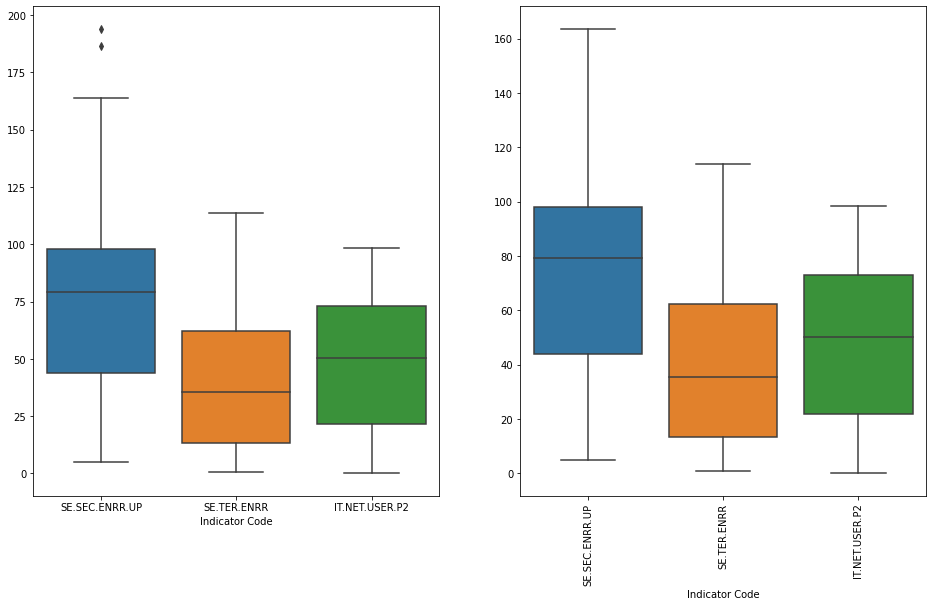

In [183]:
plt.rcParams["figure.figsize"] = [16,9]
plt.subplot(121)
sns.boxplot(data = EdStatsData_indicateur_pays.loc[:,['SE.SEC.ENRR.UP', 'SE.TER.ENRR','IT.NET.USER.P2']])
plt.subplot(122)
sns.boxplot(data = EdStatsData_indicateur_pays.loc[:,['SE.SEC.ENRR.UP', 'SE.TER.ENRR','IT.NET.USER.P2']],showfliers=False)
plt.xticks(rotation = 'vertical') 
plt.show()

In [184]:
EdStatsData_indicateur_pays[EdStatsData_indicateur_pays['SE.SEC.ENRR.UP']>175]

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.KD,SE.SEC.ENRR.UP,SE.TER.ENRR,SP.POP.TOTL,UIS.E.3,UIS.E.5.B
Country Name,,,,,,,
Australia,84.56,43832.43,186.43,90.31,2.38e+07,1.10e+06,233218.0
Finland,86.42,38885.90,194.10,87.29,5.48e+06,3.58e+05,21.0


In [185]:
EdStatsData_indicateur_pays['UIS.E.3'].describe()

count    1.96e+02
mean     1.26e+06
std      5.20e+06
min      3.53e+02
25%      3.57e+04
50%      1.79e+05
75%      7.35e+05
max      5.52e+07
Name: UIS.E.3, dtype: float64

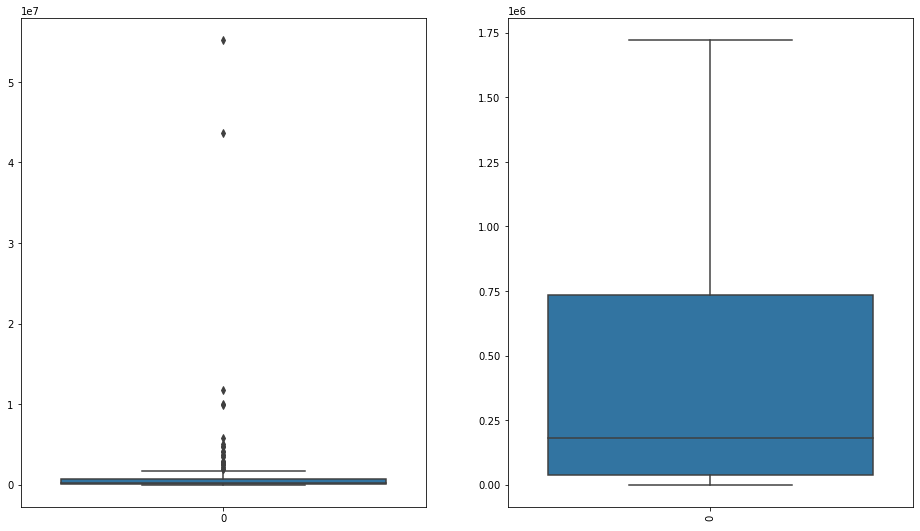

In [186]:
plt.rcParams["figure.figsize"] = [16,9]
plt.subplot(121)
sns.boxplot(data = EdStatsData_indicateur_pays['UIS.E.3'])
plt.subplot(122)
sns.boxplot(data = EdStatsData_indicateur_pays['UIS.E.3'],showfliers=False)
plt.xticks(rotation = 'vertical') 
plt.show()

In [187]:
EdStatsData_indicateur_pays[EdStatsData_indicateur_pays['UIS.E.3']>9000000]

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.KD,SE.SEC.ENRR.UP,SE.TER.ENRR,SP.POP.TOTL,UIS.E.3,UIS.E.5.B
Country Name,,,,,,,
Brazil,58.33,14666.02,91.42,50.60,2.06e+08,9.95e+06,4.07e+04
China,50.30,13569.89,89.65,43.39,1.37e+09,4.37e+07,1.79e+07
India,26.00,5754.06,63.59,26.87,1.31e+09,5.52e+07,NaN
Indonesia,21.98,10367.70,76.04,24.25,2.58e+08,9.90e+06,1.14e+06
United States,74.55,52926.54,93.29,85.80,3.21e+08,1.17e+07,7.34e+06


In [188]:
EdStatsData_indicateur_pays['UIS.E.5.B'].describe()

count    1.47e+02
mean     2.85e+05
std      1.60e+06
min      2.10e+01
25%      3.18e+03
50%      1.60e+04
75%      7.32e+04
max      1.79e+07
Name: UIS.E.5.B, dtype: float64

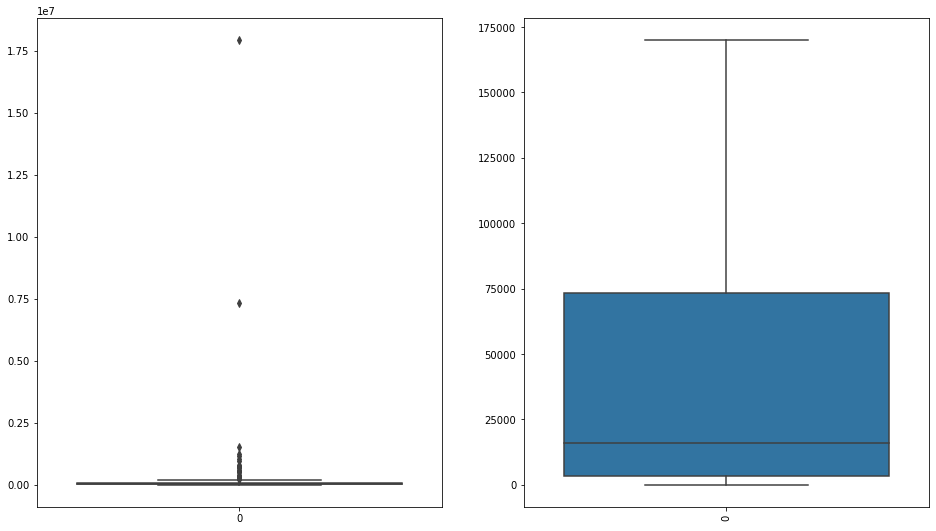

In [189]:
plt.rcParams["figure.figsize"] = [16,9]
plt.subplot(121)
sns.boxplot(data = EdStatsData_indicateur_pays['UIS.E.5.B'])
plt.subplot(122)
sns.boxplot(data = EdStatsData_indicateur_pays['UIS.E.5.B'],showfliers=False)
plt.xticks(rotation = 'vertical') 
plt.show()

In [190]:
EdStatsData_indicateur_pays[EdStatsData_indicateur_pays['UIS.E.5.B']>1000000]

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.KD,SE.SEC.ENRR.UP,SE.TER.ENRR,SP.POP.TOTL,UIS.E.3,UIS.E.5.B
Country Name,,,,,,,
China,50.30,13569.89,89.65,43.39,1.37e+09,4.37e+07,1.79e+07
Indonesia,21.98,10367.70,76.04,24.25,2.58e+08,9.90e+06,1.14e+06
"Iran, Islamic Rep.",45.33,16500.90,84.51,71.88,7.94e+07,3.69e+06,1.04e+06
Russian Federation,73.41,24124.33,113.57,80.39,1.44e+08,2.82e+06,1.21e+06
Turkey,53.74,23388.48,106.12,94.73,7.83e+07,5.00e+06,1.53e+06
United States,74.55,52926.54,93.29,85.80,3.21e+08,1.17e+07,7.34e+06


In [191]:
EdStatsData_indicateur_pays['NY.GDP.PCAP.PP.KD'].describe()

count       192.00
mean      18623.91
std       20239.64
min         626.41
25%        3655.83
50%       11589.73
75%       25795.67
max      119749.43
Name: NY.GDP.PCAP.PP.KD, dtype: float64

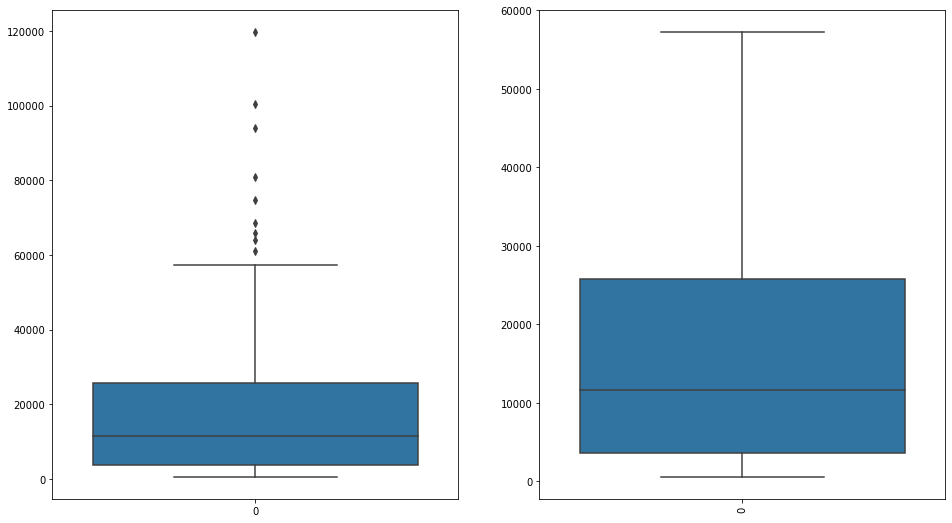

In [192]:
plt.rcParams["figure.figsize"] = [16,9]
plt.subplot(121)
sns.boxplot(data = EdStatsData_indicateur_pays['NY.GDP.PCAP.PP.KD'])
plt.subplot(122)
sns.boxplot(data = EdStatsData_indicateur_pays['NY.GDP.PCAP.PP.KD'],showfliers=False)
plt.xticks(rotation = 'vertical') 
plt.show()

In [193]:
EdStatsData_indicateur_pays[EdStatsData_indicateur_pays['NY.GDP.PCAP.PP.KD']>60000]

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.KD,SE.SEC.ENRR.UP,SE.TER.ENRR,SP.POP.TOTL,UIS.E.3,UIS.E.5.B
Country Name,,,,,,,
Brunei Darussalam,71.20,74600.16,92.70,30.84,4.18e+05,34091.0,3402.0
Ireland,80.12,61144.73,154.41,83.78,4.68e+06,150905.0,41618.0
Kuwait,77.52,68476.33,84.58,27.03,3.94e+06,108681.0,14424.0
Luxembourg,97.33,94088.59,93.75,19.41,5.70e+05,24409.0,329.0
"Macao SAR, China",77.60,100517.81,90.35,75.60,6.01e+05,16655.0,518.0
Norway,96.81,64028.42,125.49,76.70,5.19e+06,249882.0,9758.0
Qatar,92.88,119749.43,82.43,14.52,2.48e+06,40991.0,5553.0
Singapore,79.01,80892.06,NaN,NaN,5.54e+06,122028.0,92562.0
United Arab Emirates,90.50,65975.38,NaN,NaN,9.15e+06,157821.0,6564.0


## on va ne garder que les pays repondant au critere suivant :
- population > 2000000
- taux utilisation Internet > 60
- PIB > 10000

In [194]:
selection = (EdStatsData_indicateur_pays['NY.GDP.PCAP.PP.KD']>10000) & \
(EdStatsData_indicateur_pays['SP.POP.TOTL']>2000000) & \
(EdStatsData_indicateur_pays['IT.NET.USER.P2']>60 )
EdStatsData_indicateur_pays[selection]

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.KD,SE.SEC.ENRR.UP,SE.TER.ENRR,SP.POP.TOTL,UIS.E.3,UIS.E.5.B
Country Name,,,,,,,
Albania,63.25,10971.22,89.46,58.11,2.88e+06,1.52e+05,1.88e+03
Argentina,68.04,19101.30,85.23,82.92,4.34e+07,1.72e+06,9.31e+05
Australia,84.56,43832.43,186.43,90.31,2.38e+07,1.10e+06,2.33e+05
Austria,83.94,44288.93,99.62,81.54,8.63e+06,3.63e+05,7.75e+04
Azerbaijan,77.00,16698.86,NaN,25.48,9.65e+06,3.73e+05,3.73e+04
...,...,...,...,...,...,...,...
United Arab Emirates,90.50,65975.38,NaN,NaN,9.15e+06,1.58e+05,6.56e+03
United Kingdom,92.00,38839.17,138.24,56.48,6.51e+07,4.20e+06,2.85e+05
United States,74.55,52926.54,93.29,85.80,3.21e+08,1.17e+07,7.34e+06


In [195]:
pd.set_option('display.max_rows', None ) #pour afficher toutes les lignes
EdStatsData_indicateur_selection = EdStatsData_indicateur_pays[selection].dropna(axis=0)
EdStatsData_indicateur_selection

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.KD,SE.SEC.ENRR.UP,SE.TER.ENRR,SP.POP.TOTL,UIS.E.3,UIS.E.5.B
Country Name,,,,,,,
Albania,63.25,10971.22,89.46,58.11,2.88e+06,1.52e+05,1.88e+03
Argentina,68.04,19101.30,85.23,82.92,4.34e+07,1.72e+06,9.31e+05
Australia,84.56,43832.43,186.43,90.31,2.38e+07,1.10e+06,2.33e+05
Austria,83.94,44288.93,99.62,81.54,8.63e+06,3.63e+05,7.75e+04
Belarus,67.30,17229.56,119.32,87.94,9.49e+06,2.01e+05,1.09e+05
Belgium,85.05,41722.92,158.08,75.04,1.13e+07,7.76e+05,2.46e+04
Chile,64.29,22536.62,99.62,88.58,1.78e+07,1.03e+06,3.47e+05
Croatia,69.80,20758.92,92.95,69.05,4.20e+06,1.86e+05,1.07e+02
Czech Republic,75.67,30605.42,109.67,64.97,1.05e+07,4.14e+05,9.98e+02


In [196]:
# liste des pays preselectionné que l'on va utiliser après dans le calul du taux de croissance
EdStatsData_paysSelection = EdStatsData_indicateur_selection.index
EdStatsData_paysSelection = EdStatsData_paysSelection.to_list()
EdStatsData_paysSelection.append('China')
EdStatsData_paysSelection.append('India')

### on va faire un normalisation MinMax pour chaque colonne, ce qui va permettre en les ajoutant d'obtenir un score et de trier les plus interessants
    chaque valeur de la colonne sera transformé (val-Min)/(Max-Min) on aura alors un indicateur qui variera entre 0 et 1
    je vais alors additionner chaque indicateur avec le même poids pour nous donner un score

In [197]:
def normalized_col(df):
    return (df - df.min())/(df.max() - df.min())

df = pd.DataFrame(columns = EdStatsData_indicateur_selection.columns) 
for col in EdStatsData_indicateur_selection.columns:
    df[col] = normalized_col(EdStatsData_indicateur_selection[col])
df['score'] = df.sum(axis=1)


In [198]:
pays_choisi = df.sort_values(by = 'score', ascending = False).head(15)
pays_choisi

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.KD,SE.SEC.ENRR.UP,SE.TER.ENRR,SP.POP.TOTL,UIS.E.3,UIS.E.5.B,score
Country Name,,,,,,,,
United States,0.36,0.39,0.27,0.72,1.00e+00,1.00e+00,1.00e+00,4.74
Australia,0.65,0.30,0.94,0.76,6.81e-02,9.09e-02,3.18e-02,2.85
United Kingdom,0.86,0.26,0.60,0.42,1.98e-01,3.55e-01,3.89e-02,2.73
Finland,0.70,0.26,1.00,0.73,1.07e-02,2.71e-02,0.00e+00,2.73
Japan,0.84,0.25,0.33,0.49,3.92e-01,3.11e-01,1.04e-01,2.71
Denmark,0.99,0.32,0.64,0.69,1.14e-02,2.31e-02,4.56e-03,2.67
Norway,1.00,0.49,0.51,0.63,9.80e-03,1.79e-02,1.33e-03,2.65
"Korea, Rep.",0.80,0.21,0.29,0.79,1.54e-01,1.59e-01,1.07e-01,2.51
Netherlands,0.85,0.33,0.57,0.64,4.67e-02,6.03e-02,2.16e-03,2.50


In [199]:
EdStatsData_paysChoisi = (pays_choisi.index)
EdStatsData_paysChoisi = EdStatsData_paysChoisi.to_list()
EdStatsData_paysChoisi.append('China')
EdStatsData_paysChoisi.append('India')

# Partie 4 restitution données

## 4.1 données régionales

In [200]:
EdStatsData_indicateur_global = EdStatsData_nettoye_global.pivot(index='Country Name',columns='Indicator Code',values='annee_val')
EdStatsData_indicateur_global

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.KD,SE.SEC.ENRR.UP,SE.TER.ENRR,SP.POP.TOTL,UIS.E.3,UIS.E.5.B
Country Name,,,,,,,
Arab World,36.87,15454.97,55.60,28.17,3.70e+08,1.20e+07,9.54e+05
East Asia & Pacific,49.79,15142.56,79.55,39.15,2.28e+09,6.87e+07,2.26e+07
East Asia & Pacific (excluding high income),45.21,12175.50,77.17,36.47,2.04e+09,6.14e+07,2.07e+07
Euro area,78.67,37799.25,113.23,71.00,3.40e+08,1.33e+07,1.07e+06
Europe & Central Asia,71.16,28801.64,108.25,65.08,9.07e+08,3.55e+07,5.22e+06
Europe & Central Asia (excluding high income),60.26,18527.60,95.97,62.07,4.15e+08,1.40e+07,3.76e+06
European Union,75.50,34381.18,117.24,67.71,5.07e+08,2.20e+07,1.45e+06
Heavily indebted poor countries (HIPC),13.14,2064.98,28.98,8.12,7.24e+08,1.22e+07,1.04e+06
High income,80.01,42837.62,107.81,73.75,1.18e+09,4.59e+07,1.18e+07


In [201]:
EdStatsData_indicateur_global = EdStatsData_indicateur_global.iloc[[0, 1, 4, 6, 9, 15, 19, 21, 22],:]
EdStatsData_indicateur_global

Indicator Code,IT.NET.USER.P2,NY.GDP.PCAP.PP.KD,SE.SEC.ENRR.UP,SE.TER.ENRR,SP.POP.TOTL,UIS.E.3,UIS.E.5.B
Country Name,,,,,,,
Arab World,36.87,15454.97,55.60,28.17,3.70e+08,1.20e+07,9.54e+05
East Asia & Pacific,49.79,15142.56,79.55,39.15,2.28e+09,6.87e+07,2.26e+07
Europe & Central Asia,71.16,28801.64,108.25,65.08,9.07e+08,3.55e+07,5.22e+06
European Union,75.50,34381.18,117.24,67.71,5.07e+08,2.20e+07,1.45e+06
Latin America & Caribbean,54.28,14504.16,80.04,44.66,6.31e+08,2.54e+07,3.02e+06
Middle East & North Africa,44.23,17476.92,66.64,37.92,4.29e+08,1.50e+07,1.90e+06
North America,75.94,51927.56,95.64,84.03,3.57e+08,1.32e+07,7.69e+06
South Asia,23.19,5329.50,52.38,20.84,1.74e+09,6.99e+07,2.78e+05
Sub-Saharan Africa,17.76,3493.57,35.10,8.59,1.01e+09,2.12e+07,2.22e+06


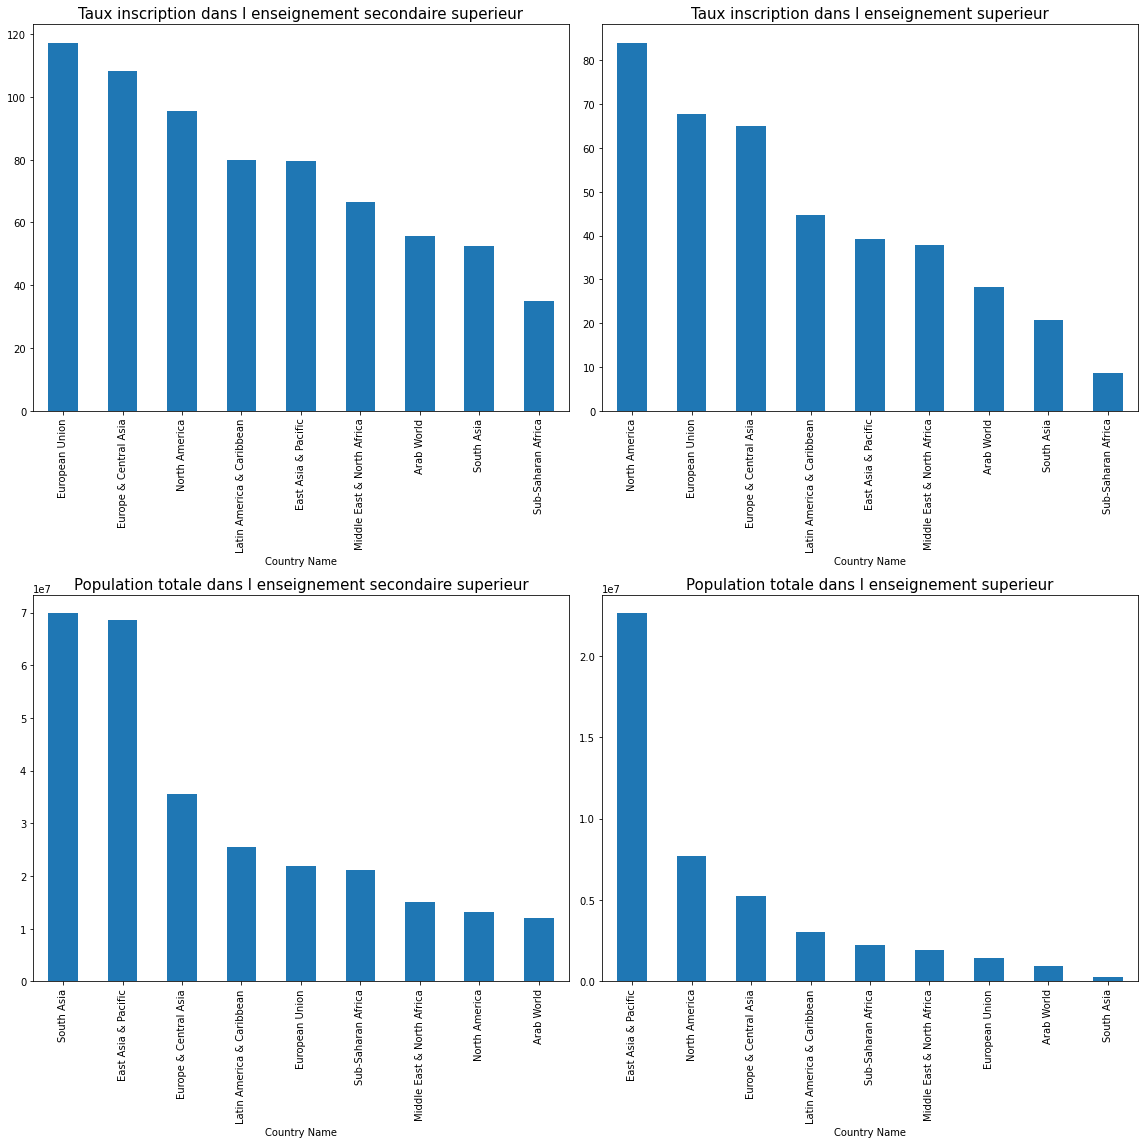

In [202]:
plt.rcParams["figure.figsize"] = [16, 16]
plt.tick_params(axis = 'both', labelsize = 15)
plt.subplot(221)
plt.title('Taux inscription dans l enseignement secondaire superieur').set_fontsize(15)
EdStatsData_indicateur_global = EdStatsData_indicateur_global.sort_values(by = 'SE.SEC.ENRR.UP', ascending = False)
EdStatsData_indicateur_global['SE.SEC.ENRR.UP'].plot( kind = 'bar')
plt.subplot(222)
plt.title('Taux inscription dans l enseignement superieur').set_fontsize(15)
EdStatsData_indicateur_global = EdStatsData_indicateur_global.sort_values(by = 'SE.TER.ENRR', ascending = False)
EdStatsData_indicateur_global['SE.TER.ENRR'].plot( kind = 'bar')
plt.subplot(223)
plt.title('Population totale dans l enseignement secondaire superieur').set_fontsize(15)
EdStatsData_indicateur_global = EdStatsData_indicateur_global.sort_values(by = 'UIS.E.3', ascending = False)
EdStatsData_indicateur_global['UIS.E.3'].plot( kind = 'bar')
plt.subplot(224)
plt.title('Population totale dans l enseignement superieur').set_fontsize(15)
EdStatsData_indicateur_global = EdStatsData_indicateur_global.sort_values(by = 'UIS.E.5.B', ascending = False)
EdStatsData_indicateur_global['UIS.E.5.B'].plot( kind = 'bar')
plt.tight_layout()
plt.savefig('EdStatsData_indicateur_global.png')
plt.draw()

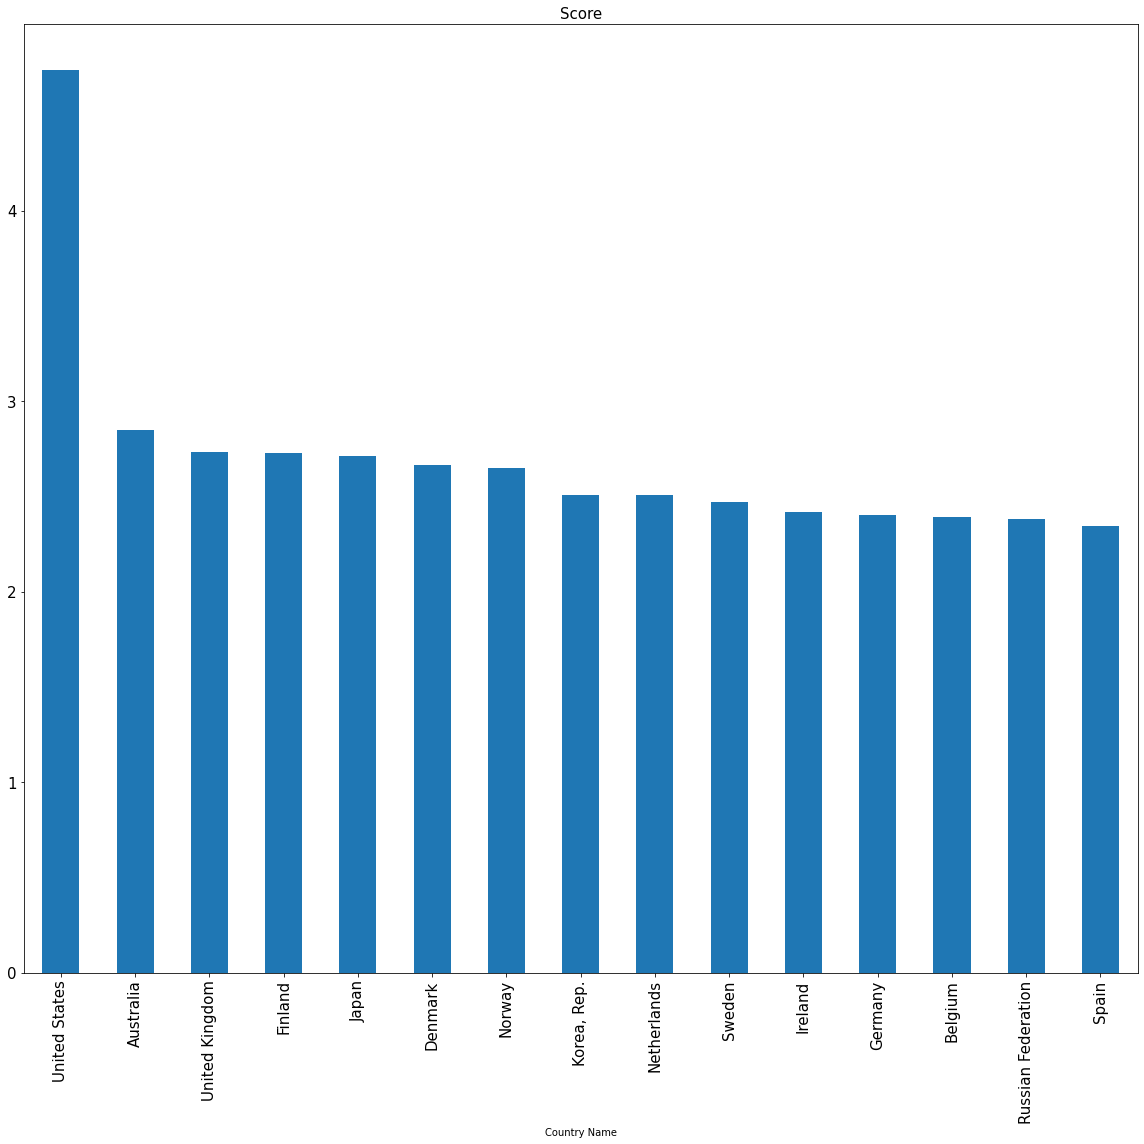

In [203]:
plt.title('Score').set_fontsize(15)
plt.tick_params(axis = 'both', labelsize = 15)
pays_choisi['score'].plot( kind = 'bar')
plt.tight_layout()
plt.savefig('EdStatsData_indicateur_pays.png')

In [289]:
pays_choisi['score']

Country Name
United States         4.74
Australia             2.85
United Kingdom        2.73
Finland               2.73
Japan                 2.71
Denmark               2.67
Norway                2.65
Korea, Rep.           2.51
Netherlands           2.50
Sweden                2.47
Ireland               2.42
Germany               2.40
Belgium               2.39
Russian Federation    2.38
Spain                 2.34
Name: score, dtype: float64

In [290]:
EdStatsData_nettoye_Pays_croissance.loc[(EdStatsData_nettoye_Pays_croissance['Country Name']=='United States') & (EdStatsData_nettoye_Pays_croissance['Indicator Code']=='NY.GDP.PCAP.PP.KD'),annee].squeeze()

2005    49762.24
2006    50598.95
2007    51011.43
2008    50383.84
2009    48557.87
2010    49372.62
2011    49790.67
2012    50519.53
2013    51008.46
2014    51830.99
2015    52926.54
Name: 847861, dtype: float64

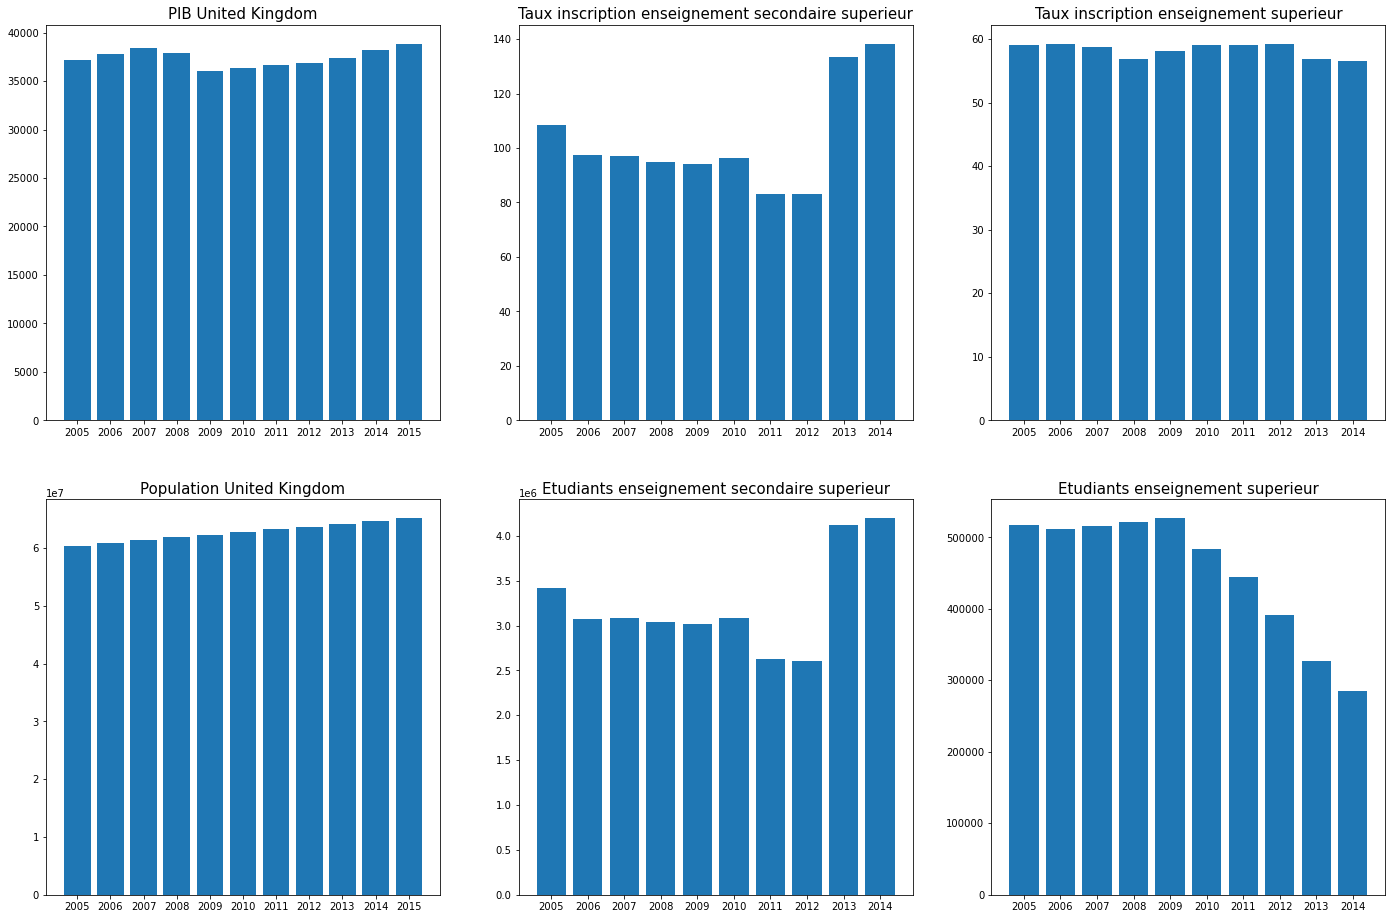

In [320]:
x = annee
pays_graph = 'United Kingdom'
fichier = 'EdStatsData_PAYS_'+pays_graph+'.png'

plt.rcParams["figure.figsize"] = [24, 16]
plt.tick_params(axis = 'both', labelsize = 15)

plt.subplot(231)
y = EdStatsData_nettoye_Pays_croissance.loc[(EdStatsData_nettoye_Pays_croissance['Country Name']==pays_graph) & (EdStatsData_nettoye_Pays_croissance['Indicator Code']=='NY.GDP.PCAP.PP.KD'),annee].squeeze()
plt.title('PIB '+pays_graph).set_fontsize(15)
plt.bar(x,y)

plt.subplot(232)
y = EdStatsData_nettoye_Pays_croissance.loc[(EdStatsData_nettoye_Pays_croissance['Country Name']==pays_graph) & (EdStatsData_nettoye_Pays_croissance['Indicator Code']=='SE.SEC.ENRR.UP'),annee].squeeze()
plt.title('Taux inscription enseignement secondaire superieur').set_fontsize(15)
plt.bar(x,y)

plt.subplot(233)
y = EdStatsData_nettoye_Pays_croissance.loc[(EdStatsData_nettoye_Pays_croissance['Country Name']==pays_graph) & (EdStatsData_nettoye_Pays_croissance['Indicator Code']=='SE.TER.ENRR'),annee].squeeze()
plt.title('Taux inscription enseignement superieur').set_fontsize(15)
plt.bar(x,y)

plt.subplot(234)
y = EdStatsData_nettoye_Pays_croissance.loc[(EdStatsData_nettoye_Pays_croissance['Country Name']==pays_graph) & (EdStatsData_nettoye_Pays_croissance['Indicator Code']=='SP.POP.TOTL'),annee].squeeze()
plt.title('Population '+pays_graph).set_fontsize(15)
plt.bar(x,y)

plt.subplot(235)
y = EdStatsData_nettoye_Pays_croissance.loc[(EdStatsData_nettoye_Pays_croissance['Country Name']==pays_graph) & (EdStatsData_nettoye_Pays_croissance['Indicator Code']=='UIS.E.3'),annee].squeeze()
plt.title('Etudiants enseignement secondaire superieur').set_fontsize(15)
plt.bar(x,y)

plt.subplot(236)
y = EdStatsData_nettoye_Pays_croissance.loc[(EdStatsData_nettoye_Pays_croissance['Country Name']==pays_graph) & (EdStatsData_nettoye_Pays_croissance['Indicator Code']=='UIS.E.5.B'),annee].squeeze()
plt.title('Etudiants enseignement superieur').set_fontsize(15)
plt.bar(x,y)

plt.draw()

plt.savefig(fichier)


# Partie 5 recherche de pays avec fort taux de croissance

On repart du dataFrame nettoyé et on va calculer le tax de croissance pour les indicateurs

In [204]:
EdStatsData_nettoye_Pays.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,annee_val
92831,Afghanistan,AFG,"Enrolment in tertiary education, ISCED 5 programmes, both sexes (number)",UIS.E.5.B,NaN,NaN,NaN,NaN,NaN,NaN,37329.00,NaN,NaN,NaN,NaN,37329.00
92839,Afghanistan,AFG,"Enrolment in upper secondary education, both sexes (number)",UIS.E.3,190104.00,271144.00,285290.00,361193.00,443002.00,567344.00,743405.00,881415.00,969267.00,968769.00,NaN,968769.00
92871,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 international $)",NY.GDP.PCAP.PP.KD,1136.12,1161.12,1284.78,1298.14,1531.17,1614.26,1660.74,1839.27,1814.16,1780.38,1747.98,1747.98
92964,Afghanistan,AFG,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,3.90,NaN,3.76,NaN,NaN,8.66,NaN,8.66
92968,Afghanistan,AFG,"Gross enrolment ratio, upper secondary, both sexes (%)",SE.SEC.ENRR.UP,12.11,16.97,17.56,21.80,26.05,32.13,39.86,44.57,46.26,43.91,42.61,42.61


In [205]:
#pd.set_option('display.max_rows', 5 ) #pour afficher toutes les lignes
pd.reset_option('display.max_rows')
EdStatsData_nettoye_Pays_croissance = EdStatsData_nettoye_Pays.dropna(thresh=6, subset = annee)

In [206]:
#pays presectionné
pd.reset_option('display.max_rows')
#EdStatsData_pays_croissance = EdStatsData_nettoye_Pays_croissance.pivot(index='Country Name',columns='Indicator Code',values='annee_val')
#liste_pays_croissance = EdStatsData_pays_croissance[EdStatsData_pays_croissance['SP.POP.TOTL']>1000000].index
EdStatsData_nettoye_Pays_croissance=EdStatsData_nettoye_Pays_croissance[EdStatsData_nettoye_Pays_croissance['Country Name'].isin(EdStatsData_paysSelection)]

In [207]:
def calcul_croissance(row):
    annees = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    tab_croissance = []
    for i in range(1, len(annees)):
        annee_n = row[annees[i]]
        annee_n_1 = row[annees[i-1]]
        if not np.isnan(annee_n) and not np.isnan(annee_n_1) and (annee_n != 0):
            elt = (annee_n - annee_n_1)/annee_n*100
            tab_croissance.append(elt)
    if len(tab_croissance) > 0:
        return np.asarray(tab_croissance).mean()
    else:
        return 0

EdStatsData_nettoye_Pays_croissance['croissanceMean'] = EdStatsData_nettoye_Pays_croissance.apply(calcul_croissance, axis = 1)

In [208]:
sansIndicInet = EdStatsData_nettoye_Pays_croissance['Indicator Code']!='IT.NET.USER.P2'
EdStatsData_nettoye_Pays_croissance[sansIndicInet].sort_values(by ='croissanceMean', ascending = False).head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,annee_val,croissanceMean
671901,Qatar,QAT,"Enrolment in tertiary education, ISCED 5 programmes, both sexes (number)",UIS.E.5.B,271.00,NaN,2.12e+03,2.34e+03,2.70e+03,2.91e+03,3.99e+03,4.54e+03,4.49e+03,5.55e+03,NaN,5.55e+03,12.43
673228,Qatar,QAT,"Population, total",SP.POP.TOTL,864863.00,1.01e+06,1.19e+06,1.39e+06,1.59e+06,1.78e+06,1.95e+06,2.11e+06,2.25e+06,2.37e+06,2.48e+06,2.48e+06,9.92
133146,Austria,AUT,"Enrolment in tertiary education, ISCED 5 programmes, both sexes (number)",UIS.E.5.B,25253.00,2.40e+04,2.31e+04,1.91e+04,3.12e+04,3.59e+04,3.80e+04,4.04e+04,7.68e+04,7.75e+04,NaN,7.75e+04,9.08
415484,India,IND,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,10.73,1.15e+01,1.32e+01,1.51e+01,1.61e+01,1.79e+01,2.29e+01,2.44e+01,2.39e+01,2.55e+01,2.69e+01,2.69e+01,8.58
96629,Albania,ALB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,23.31,2.66e+01,3.07e+01,3.21e+01,3.34e+01,4.45e+01,4.97e+01,5.86e+01,6.25e+01,6.27e+01,5.81e+01,5.81e+01,8.32


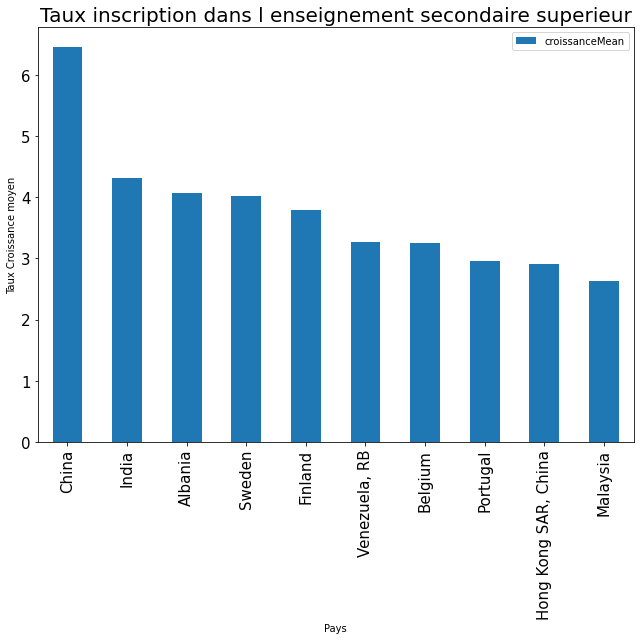

In [209]:
plt.rcParams["figure.figsize"] = [9, 9]
indicSort = EdStatsData_nettoye_Pays_croissance['Indicator Code']=='SE.SEC.ENRR.UP'
EdStatsData_nettoye_Pays_croissance.loc[indicSort,['Country Name','croissanceMean']].\
                        sort_values('croissanceMean', ascending = False).head(10).plot(x='Country Name', kind = 'bar')
plt.tick_params(axis = 'both', labelsize = 15)
plt.title('Taux inscription dans l enseignement secondaire superieur').set_fontsize(20)
plt.xlabel("Pays")
plt.ylabel("Taux Croissance moyen")
plt.tight_layout()
plt.savefig('EdStatsData_croissance_SESEC.png')
plt.show()

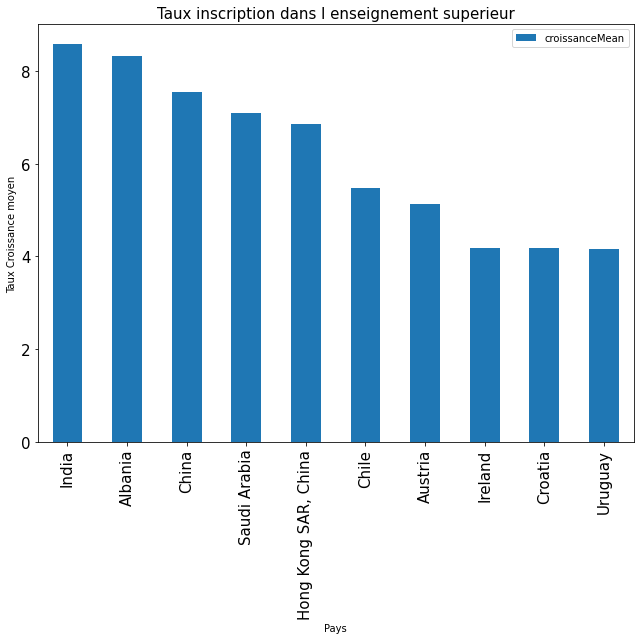

In [210]:
plt.rcParams["figure.figsize"] = [9, 9]
indicSort = EdStatsData_nettoye_Pays_croissance['Indicator Code']=='SE.TER.ENRR'
EdStatsData_nettoye_Pays_croissance.loc[indicSort,['Country Name','croissanceMean']].\
                        sort_values('croissanceMean', ascending = False).head(10).plot(x='Country Name', kind = 'bar')
plt.tick_params(axis = 'both', labelsize = 15)
plt.title('Taux inscription dans l enseignement superieur').set_fontsize(15)
plt.xlabel("Pays")
plt.ylabel("Taux Croissance moyen")
plt.tight_layout()
plt.savefig('EdStatsData_croissance_SETER.png')
plt.show()

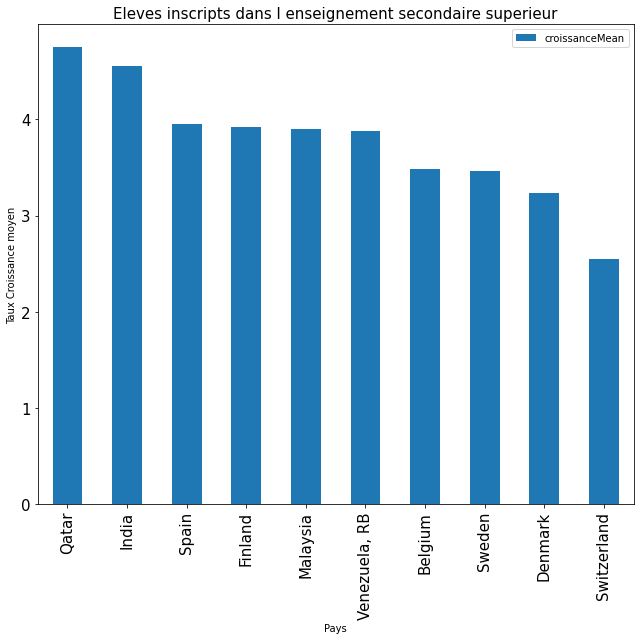

In [211]:
plt.rcParams["figure.figsize"] = [9, 9]
indicSort = EdStatsData_nettoye_Pays_croissance['Indicator Code']=='UIS.E.3'
EdStatsData_nettoye_Pays_croissance.loc[indicSort,['Country Name','croissanceMean']].\
                        sort_values('croissanceMean', ascending = False).head(10).plot(x='Country Name', kind = 'bar')
plt.tick_params(axis = 'both', labelsize = 15)
plt.title('Eleves inscripts dans l enseignement secondaire superieur').set_fontsize(15)
plt.xlabel("Pays")
plt.ylabel("Taux Croissance moyen")
plt.tight_layout()
plt.savefig('EdStatsData_croissance_UISE3.png')
plt.show()

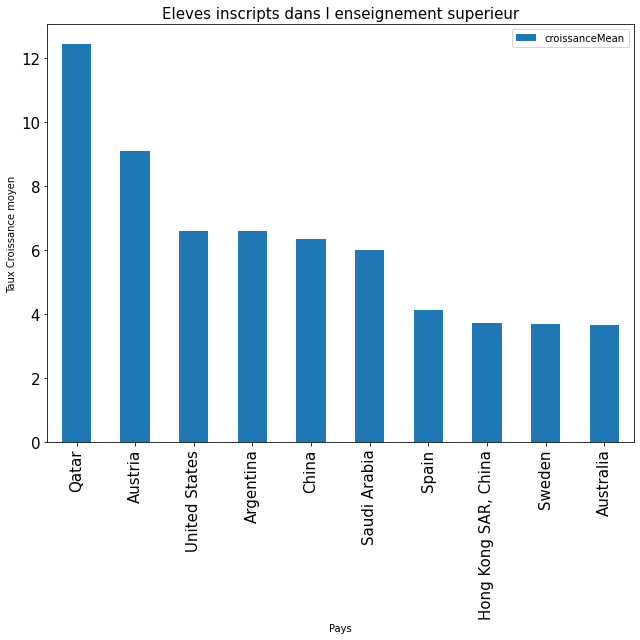

In [212]:
plt.rcParams["figure.figsize"] = [9, 9]
indicSort = EdStatsData_nettoye_Pays_croissance['Indicator Code']=='UIS.E.5.B'
EdStatsData_nettoye_Pays_croissance.loc[indicSort,['Country Name','croissanceMean']].\
                        sort_values('croissanceMean', ascending = False).head(10).plot(x='Country Name', kind = 'bar')
plt.tick_params(axis = 'both', labelsize = 15)
plt.title('Eleves inscripts dans l enseignement superieur').set_fontsize(15)
plt.xlabel("Pays")
plt.ylabel("Taux Croissance moyen")
plt.tight_layout()
plt.savefig('EdStatsData_croissance_UISE5B.png')
plt.show()

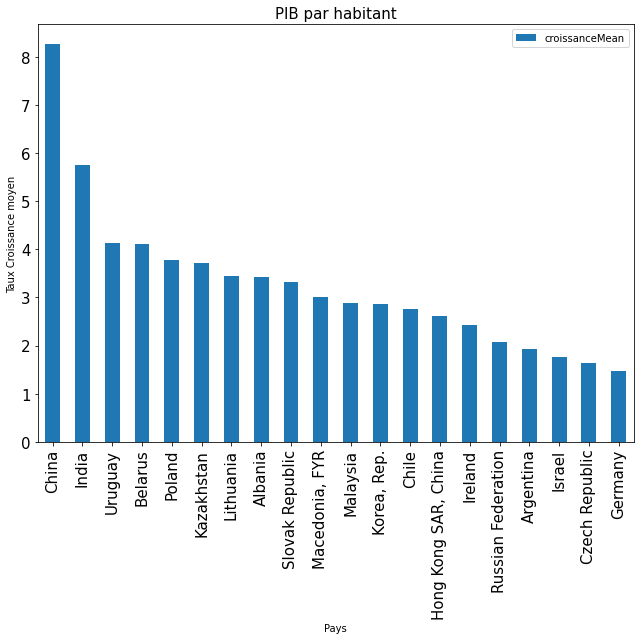

In [213]:
plt.rcParams["figure.figsize"] = [9, 9]
indicSort = EdStatsData_nettoye_Pays_croissance['Indicator Code']=='NY.GDP.PCAP.PP.KD'
EdStatsData_nettoye_Pays_croissance.loc[indicSort,['Country Name','croissanceMean']].\
                        sort_values('croissanceMean', ascending = False).head(20).plot(x='Country Name', kind = 'bar')
plt.tick_params(axis = 'both', labelsize = 15)
plt.title('PIB par habitant').set_fontsize(15)
plt.xlabel("Pays")
plt.ylabel("Taux Croissance moyen")
plt.tight_layout()
plt.savefig('EdStatsData_croissance_PIB.png')
plt.show()

In [218]:
pd.set_option('display.max_rows', None ) 
PaysCroissance = EdStatsData_nettoye_Pays_croissance.loc[indicSort,['Country Name','croissanceMean']].\
                        sort_values('croissanceMean', ascending = False).head(10)['Country Name']
listPaysCroissance = PaysCroissance.to_list()
EdStatsData_nettoye_Pays_croissance[EdStatsData_nettoye_Pays_croissance['Country Name'].isin(listPaysCroissance)]

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,annee_val,croissanceMean
96504,Albania,ALB,"Enrolment in upper secondary education, both sexes (number)",UIS.E.3,1.56e+05,1.65e+05,1.73e+05,1.78e+05,1.33e+05,1.41e+05,1.50e+05,1.52e+05,1.54e+05,1.52e+05,NaN,1.52e+05,-0.89
96536,Albania,ALB,"GDP per capita, PPP (constant 2011 international $)",NY.GDP.PCAP.PP.KD,7.73e+03,8.20e+03,8.75e+03,9.15e+03,9.52e+03,9.93e+03,1.02e+04,1.04e+04,1.05e+04,1.07e+04,1.10e+04,1.10e+04,3.42
96629,Albania,ALB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,2.33e+01,2.66e+01,3.07e+01,3.21e+01,3.34e+01,4.45e+01,4.97e+01,5.86e+01,6.25e+01,6.27e+01,5.81e+01,5.81e+01,8.32
96633,Albania,ALB,"Gross enrolment ratio, upper secondary, both sexes (%)",SE.SEC.ENRR.UP,5.87e+01,6.17e+01,6.71e+01,7.11e+01,7.29e+01,7.89e+01,8.61e+01,8.94e+01,9.30e+01,9.39e+01,8.95e+01,8.95e+01,4.06
96665,Albania,ALB,Internet users (per 100 people),IT.NET.USER.P2,6.04e+00,9.61e+00,1.50e+01,2.39e+01,4.12e+01,4.50e+01,4.90e+01,5.47e+01,5.72e+01,6.01e+01,6.33e+01,6.33e+01,19.35
97823,Albania,ALB,"Population, total",SP.POP.TOTL,3.01e+06,2.99e+06,2.97e+06,2.95e+06,2.93e+06,2.91e+06,2.91e+06,2.90e+06,2.90e+06,2.89e+06,2.88e+06,2.88e+06,-0.45
155136,Belarus,BLR,"Enrolment in tertiary education, ISCED 5 programmes, both sexes (number)",UIS.E.5.B,1.58e+05,1.54e+05,1.53e+05,1.23e+05,1.25e+05,1.29e+05,1.32e+05,1.31e+05,1.22e+05,1.09e+05,NaN,1.09e+05,-4.52
155176,Belarus,BLR,"GDP per capita, PPP (constant 2011 international $)",NY.GDP.PCAP.PP.KD,1.12e+04,1.24e+04,1.35e+04,1.50e+04,1.50e+04,1.62e+04,1.72e+04,1.75e+04,1.77e+04,1.79e+04,1.72e+04,1.72e+04,4.10
155269,Belarus,BLR,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,6.71e+01,6.94e+01,7.16e+01,7.12e+01,7.45e+01,7.94e+01,8.57e+01,9.04e+01,9.10e+01,8.89e+01,8.79e+01,8.79e+01,2.62
155273,Belarus,BLR,"Gross enrolment ratio, upper secondary, both sexes (%)",SE.SEC.ENRR.UP,NaN,NaN,NaN,NaN,NaN,1.26e+02,1.21e+02,1.16e+02,1.09e+02,1.13e+02,1.19e+02,1.19e+02,-1.21


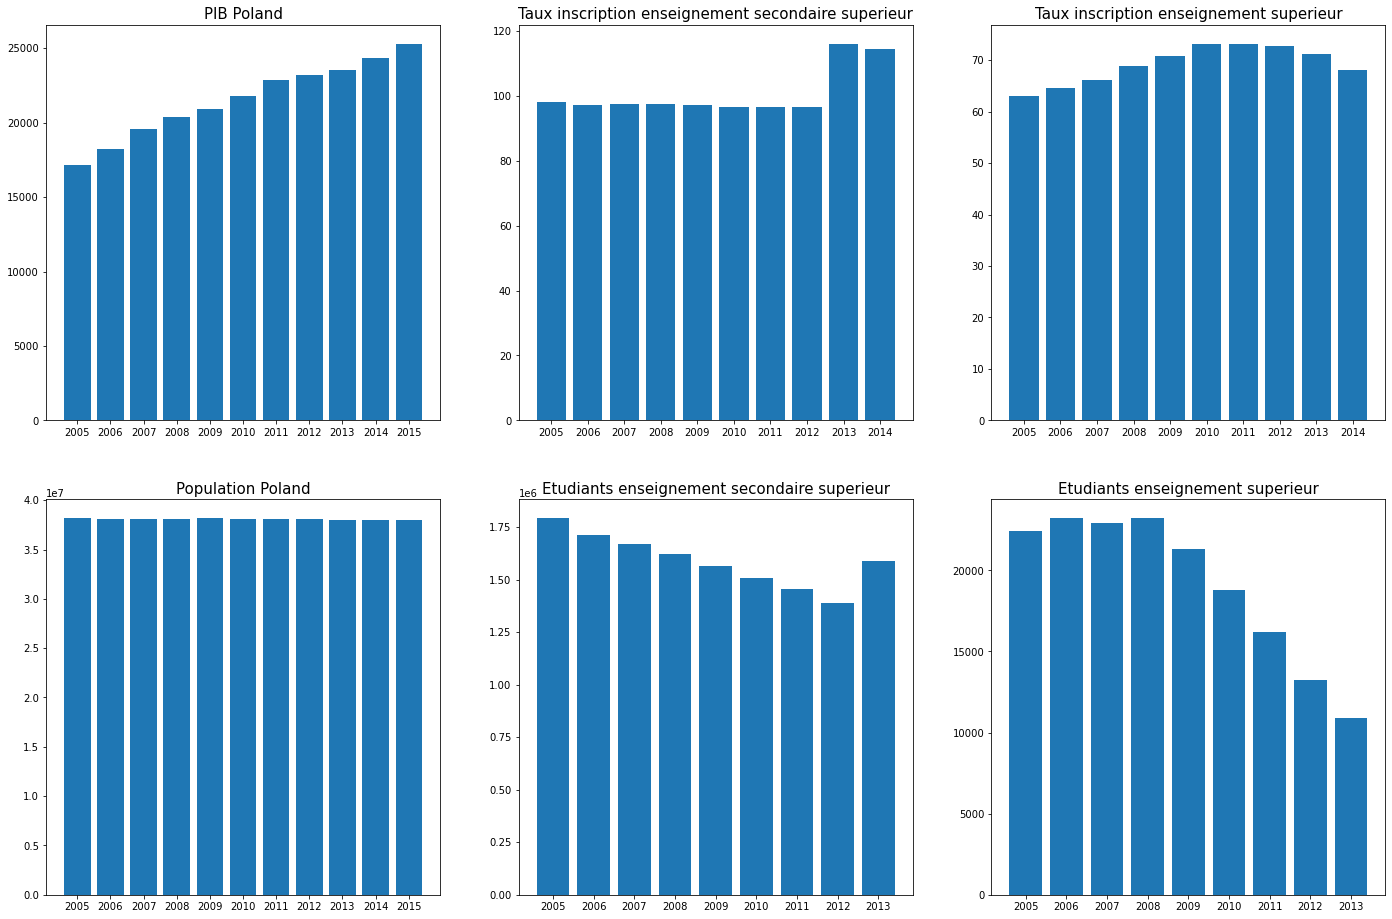

In [324]:
x = annee
pays_graph = 'Poland'
fichier = 'EdStatsData_PAYS_'+pays_graph+'.png'

plt.rcParams["figure.figsize"] = [24, 16]
plt.tick_params(axis = 'both', labelsize = 15)

plt.subplot(231)
y = EdStatsData_nettoye_Pays_croissance.loc[(EdStatsData_nettoye_Pays_croissance['Country Name']==pays_graph) & (EdStatsData_nettoye_Pays_croissance['Indicator Code']=='NY.GDP.PCAP.PP.KD'),annee].squeeze()
plt.title('PIB '+pays_graph).set_fontsize(15)
plt.bar(x,y)

plt.subplot(232)
y = EdStatsData_nettoye_Pays_croissance.loc[(EdStatsData_nettoye_Pays_croissance['Country Name']==pays_graph) & (EdStatsData_nettoye_Pays_croissance['Indicator Code']=='SE.SEC.ENRR.UP'),annee].squeeze()
plt.title('Taux inscription enseignement secondaire superieur').set_fontsize(15)
plt.bar(x,y)

plt.subplot(233)
y = EdStatsData_nettoye_Pays_croissance.loc[(EdStatsData_nettoye_Pays_croissance['Country Name']==pays_graph) & (EdStatsData_nettoye_Pays_croissance['Indicator Code']=='SE.TER.ENRR'),annee].squeeze()
plt.title('Taux inscription enseignement superieur').set_fontsize(15)
plt.bar(x,y)

plt.subplot(234)
y = EdStatsData_nettoye_Pays_croissance.loc[(EdStatsData_nettoye_Pays_croissance['Country Name']==pays_graph) & (EdStatsData_nettoye_Pays_croissance['Indicator Code']=='SP.POP.TOTL'),annee].squeeze()
plt.title('Population '+pays_graph).set_fontsize(15)
plt.bar(x,y)

plt.subplot(235)
y = EdStatsData_nettoye_Pays_croissance.loc[(EdStatsData_nettoye_Pays_croissance['Country Name']==pays_graph) & (EdStatsData_nettoye_Pays_croissance['Indicator Code']=='UIS.E.3'),annee].squeeze()
plt.title('Etudiants enseignement secondaire superieur').set_fontsize(15)
plt.bar(x,y)

plt.subplot(236)
y = EdStatsData_nettoye_Pays_croissance.loc[(EdStatsData_nettoye_Pays_croissance['Country Name']==pays_graph) & (EdStatsData_nettoye_Pays_croissance['Indicator Code']=='UIS.E.5.B'),annee].squeeze()
plt.title('Etudiants enseignement superieur').set_fontsize(15)
plt.bar(x,y)

plt.draw()

plt.savefig(fichier)
